In [12]:

# graph neural network 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


import torch
from torch import tensor
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, Linear, GraphConv

import rootutils
root = rootutils.setup_root("./scripts/", dotenv=True, pythonpath=True,  indicator =  [".project-root"], cwd = True)




from scripts.nb_functions import find_filtered_voronoi_neighbor_knn_limited_mask

from scripts.models import CustomGNN
from scripts.environment import Environment
from scripts.utils import prune, get_quality, show_graph


In [13]:

positions = []

data = []

for i in range(10):
    positions.append(np.load(f"positions/random_{i}_positions.npy"))
    SMAD_ERK = np.load(f"positions/random_{i}_SMAD_and_ERK.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.

    d = SMAD_ERK[:201,:,:]
    data.append(d)
    # print(d.shape)
    

(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
10
model1 | 0.2 loss: 342.7238166332245 | accuracy: 0.3184705674648285 | l1 weights: 0.1977028250694275
20
model1 | 0.4 loss: 282.9364836215973 | accuracy: 0.2690310478210449 | l1 weights: 0.21253648400306702
30
model1 | 0.6 loss: 235.2040559053421 | accuracy: 0.210569366812706 | l1 weights: 0.2298082709312439
40
model1 | 0.8 loss: 209.4484567642212 | accuracy: 0.18660610914230347 | l1 weights: 0.246538907289505
50
model1 | 1.0 loss: 194.0985769033432 | accuracy: 0.1696247160434723 | l1 weights: 0.25960278511047363
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
10
model2 | 0.2 loss: 424.6395230293274 | accuracy: 0.20303232967853546 | l1 we

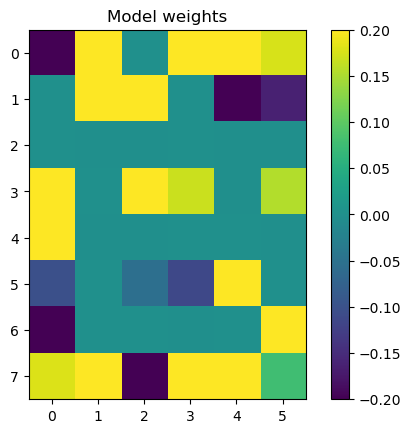

(1000, 9) (1000, 9)


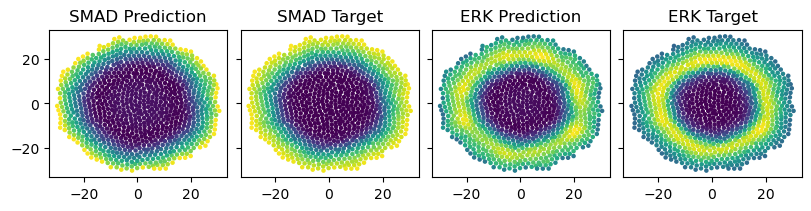

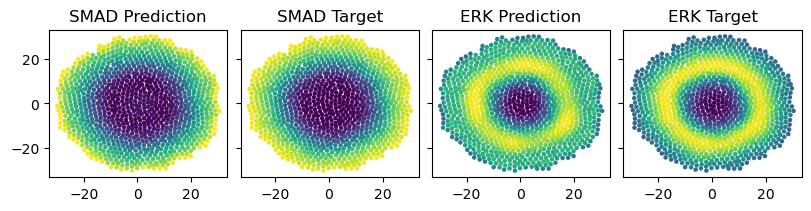

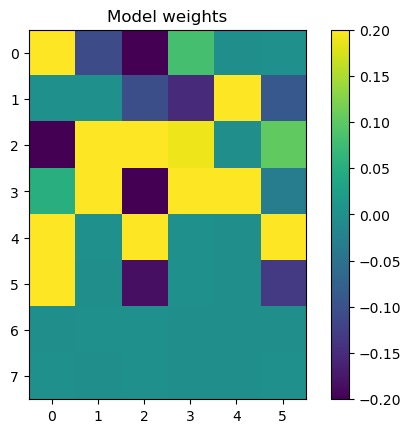

(1000, 9) (1000, 9)


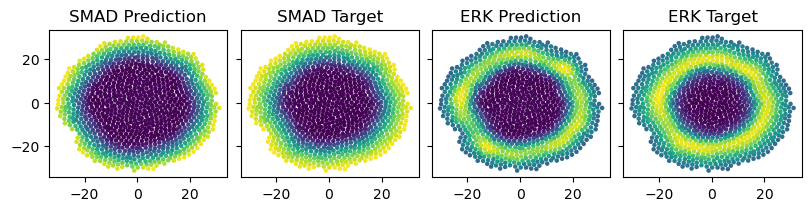

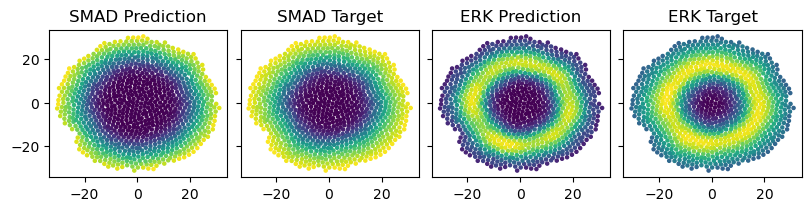

10
10
model1 | 0.4 loss: 162.29036450386047 | accuracy: 0.1180645078420639 | l1 weights: 0.2812901437282562
model2 | 0.4 loss: 159.10206735134125 | accuracy: 0.10710186511278152 | l1 weights: 0.3004193902015686
20
20
model1 | 0.8 loss: 160.34841537475586 | accuracy: 0.11442983150482178 | l1 weights: 0.28184574842453003
model2 | 0.8 loss: 156.09771013259888 | accuracy: 0.1031619980931282 | l1 weights: 0.3054661750793457
Finished training 1th iteration


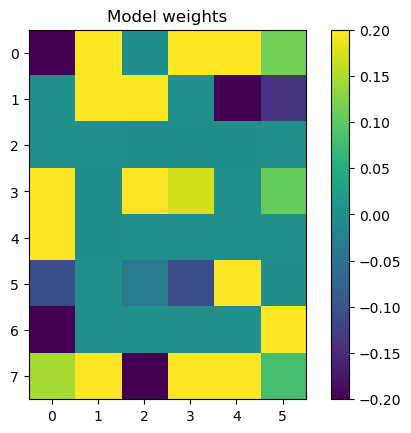

(1000, 8) (1000, 8)


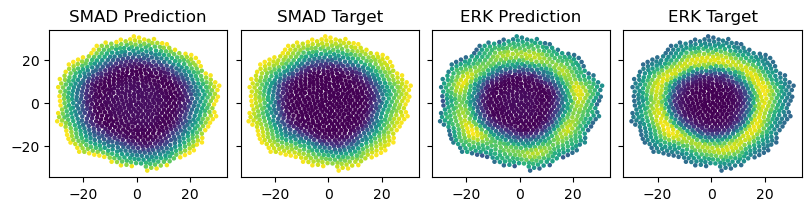

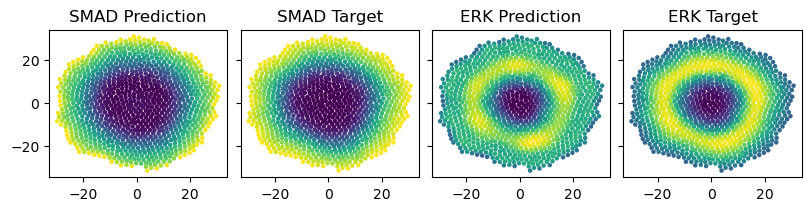

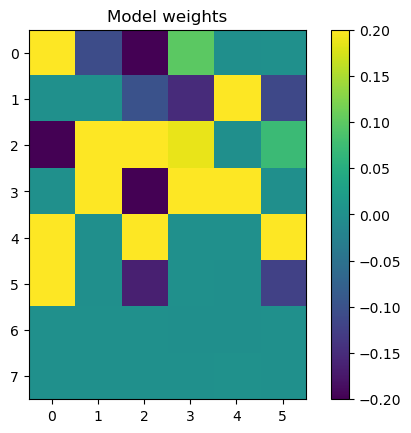

(1000, 9) (1000, 9)


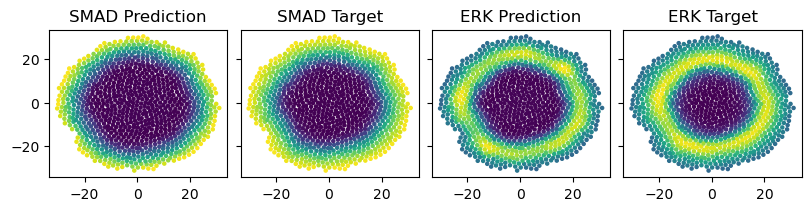

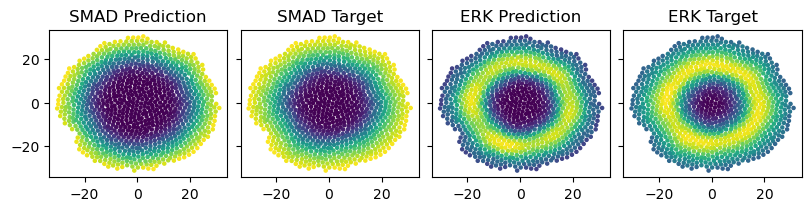

10
model1 | 0.625 loss: 157.38102793693542 | accuracy: 0.10613931715488434 | l1 weights: 0.28285178542137146
10
model2 | 0.625 loss: 153.58410775661469 | accuracy: 0.10137683153152466 | l1 weights: 0.31091374158859253
Finished training 2th iteration


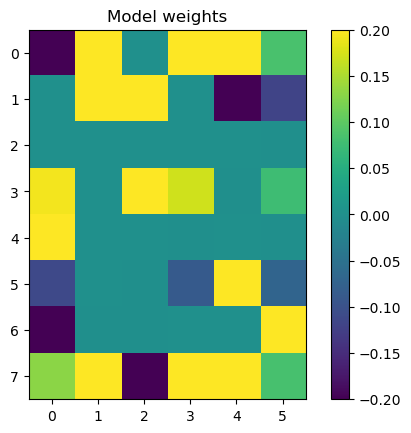

(1000, 9) (1000, 9)


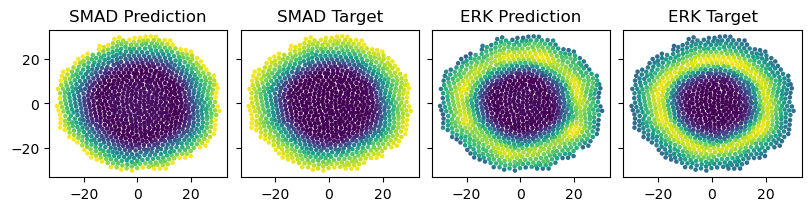

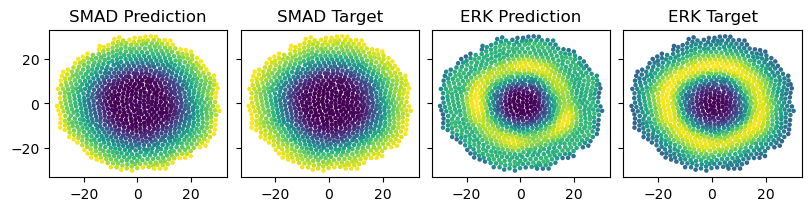

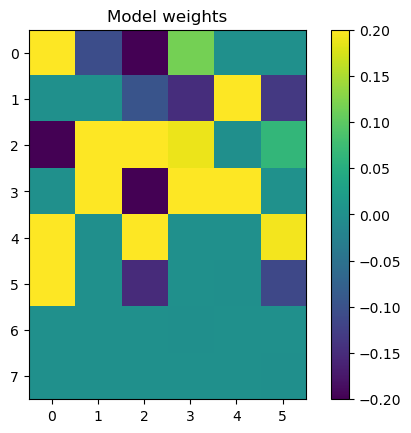

(1000, 9) (1000, 9)


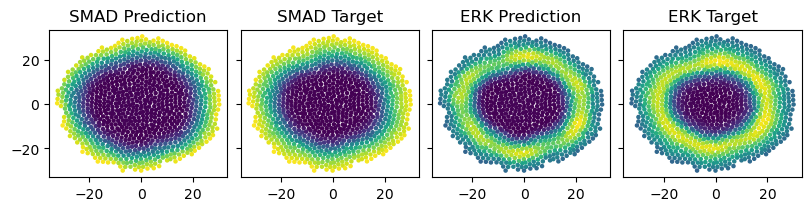

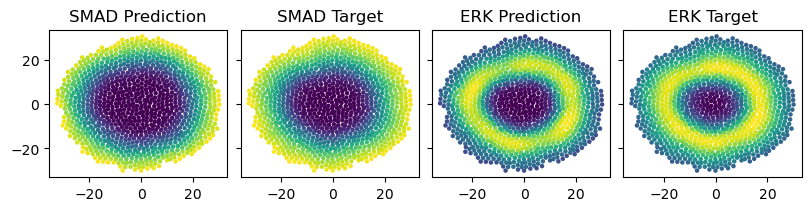

In [65]:
stepsize = 2


triple_i = 1


learning_rate = 1e-4
weight_gain = 1e-2
diversity_gain = 1e-7


model1 = CustomGNN(3, [8], 2, aggregation="mean", biases = False, name = "model1")
env1 = Environment(data, positions, lr = learning_rate, weight_gain = weight_gain, diversity_gain = diversity_gain, stepsize = stepsize, iterative_training = False)
env1.set_model(model1)
env1.train(50)

model2 = CustomGNN(3, [8], 2, aggregation="mean", biases = False, name = "model2")
env2 = Environment(data, positions, lr = learning_rate, weight_gain = weight_gain, diversity_gain = diversity_gain, stepsize = stepsize, iterative_training = False)
env2.set_model(model2)
# env2.set_previous_model(model1)
env2.train(50)

from threading import Thread
for i in range(3):
    threads = []

    # env1.set_previous_model(model2)
    # env2.set_previous_model(model1)

    t1 = Thread(target= lambda: env1.train(int(50/(i+1))))
    threads.append(t1)
    t2 = Thread(target= lambda: env2.train(int(50/(i+1))))
    threads.append(t2)
    t1.start()
    t2.start()
    for t in threads:
        t.join()
    print(f"Finished training {i}th iteration")

    for ii, model in enumerate([model1, model2]):
        torch.save(model.state_dict(), f"concurrent_model_unaffected{ii + 2*triple_i}.pth")
        plt.imshow(model.get_weights()[0].detach().numpy(), cmap="viridis", vmin=-0.2, vmax=0.2)
        plt.colorbar()
        plt.title("Model weights")
        plt.show()
        get_quality(model, data, positions, stepsize, show = 2, guess_change = False)





(1000, 8) (1000, 8)


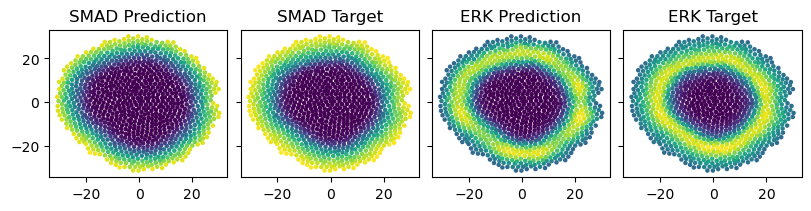

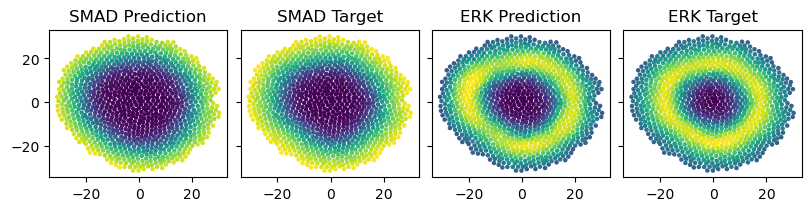

(1000, 9) (1000, 9)


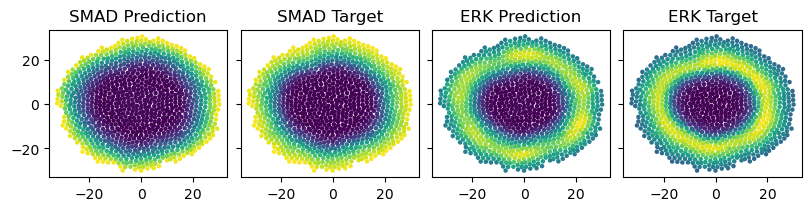

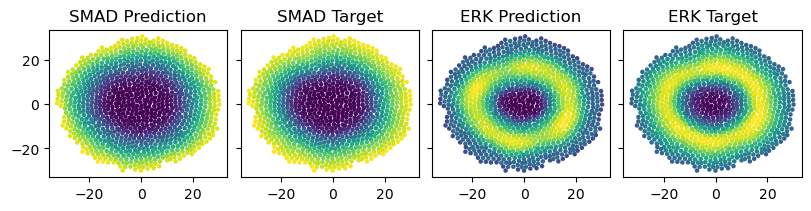

In [17]:
# load model
stepsize = 2
# model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
# model.load_state_dict(torch.load("model606.pth"))

for model in [model1, model2]:
    get_quality(model, data, positions, stepsize, show = 2, guess_change = False)


(1000, 9) (1000, 9)


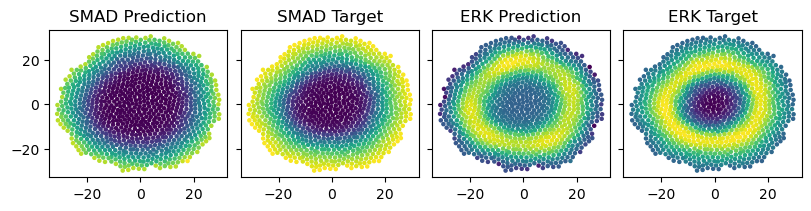

Model 0 quality: 17.17582194606148
(1000, 9) (1000, 9)


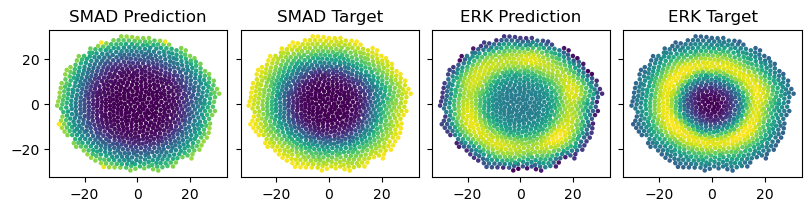

Model 1 quality: 18.547512865682727
(1000, 9) (1000, 9)


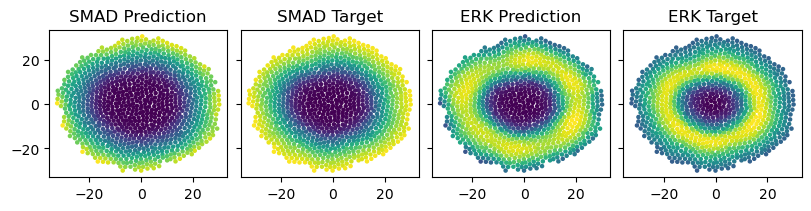

Model 2 quality: 16.615120663073338
(1000, 8) (1000, 8)


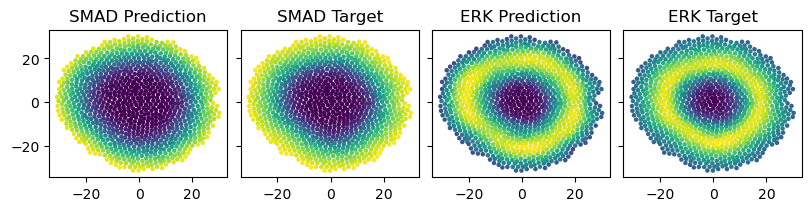

Model 3 quality: 12.155963826743063
(1000, 8) (1000, 8)


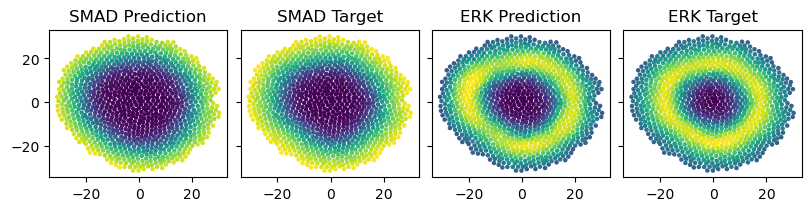

Model 4 quality: 9.720425488322364
(1000, 9) (1000, 9)


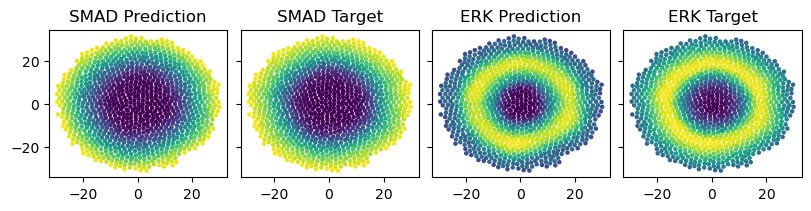

Model 5 quality: 10.026528230097938


In [50]:
# load two models
models = []
for i in range(6):
    model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(f"concurrent_model{i}.pth"))
    models.append(model)

diversities = np.zeros((len(models), len(models)))

qualities = np.zeros(len(models)) 
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i != j:

            d = Environment.get_diversity(model1.get_weights(), model2.get_weights())
            d2 = Environment.get_diversity(model2.get_weights(), model1.get_weights())
            diversities[i, j] = d

    qualities[i] = get_quality(model1, data, positions, stepsize, show = 1, guess_change = False)
    print(f"Model {i} quality: {qualities[i]}")

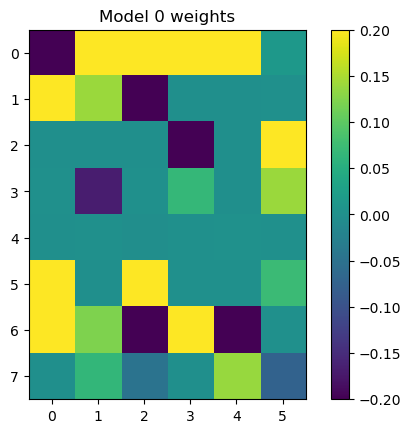

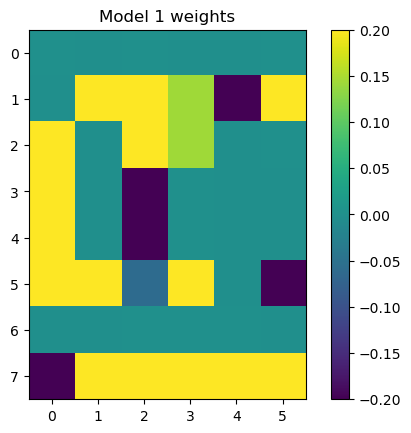

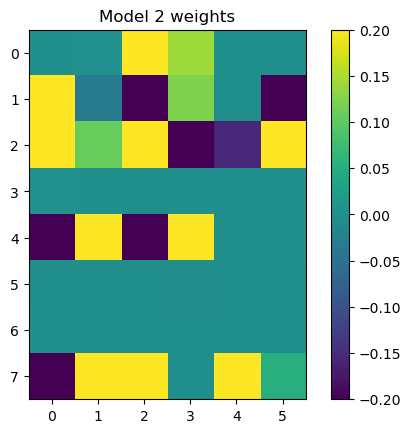

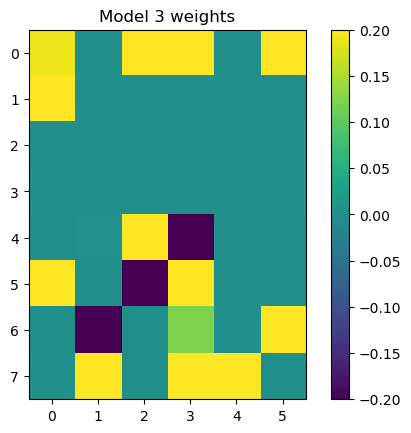

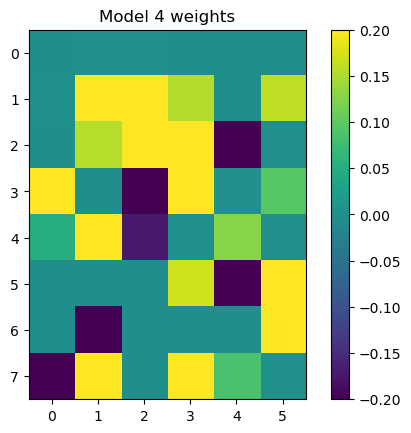

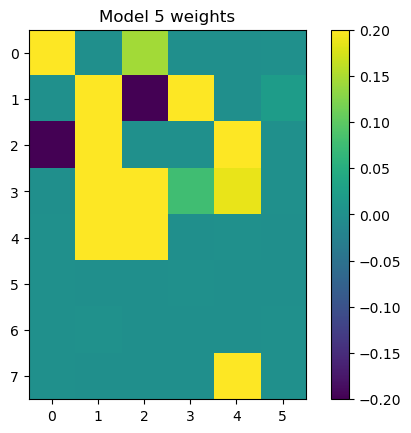

In [51]:
# plot the weights
for i, model in enumerate(models):
    plt.imshow(model.get_weights()[0].detach().numpy(), cmap="viridis", vmin=-0.2, vmax=0.2)
    plt.colorbar()
    plt.title(f"Model {i} weights")
    plt.show()

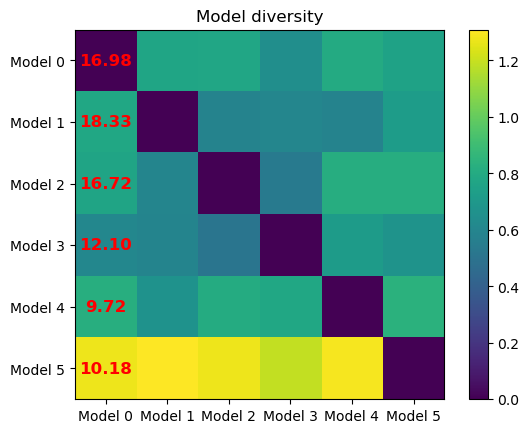

In [49]:
plt.imshow(np.abs(diversities), cmap="viridis")
plt.colorbar()
plt.title("Model diversity")

# for each y-tick, add the quality of the model
for i in range(len(models)):
    plt.text(-0., i, f"{qualities[i]:.2f}", ha='center', va='center', color='red', fontsize=12, fontdict={"weight": "bold"})
plt.xticks(range(len(models)), [f"Model {i}" for i in range(len(models))])
plt.yticks(range(len(models)), [f"Model {i}" for i in range(len(models))])
plt.show()

In [59]:
# make toy example

w1_np = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], ])
w2_np = np.array([[0.1, 0.2, 0.3], [0.4, 0.7, 0.6], ])

w1 = torch.tensor(w1_np, dtype=torch.float32)
w2 = torch.tensor(w2_np, dtype=torch.float32)

a_norms = torch.linalg.norm(w1, dim=0)
b_norms = torch.linalg.norm(w2, dim=0)
a_b_diffs = torch.linalg.norm(w1[:, :, None] - w2[:, None, :], dim=0)
layers = torch.prod(a_b_diffs , dim=1) / (a_norms[:, None] + b_norms[None, :])



sums = torch.sum(layers)

print(sums.item())

0.009525555185973644


In [62]:
print(w1_np.shape)

(2, 3)


In [60]:
(w1[:, :, None] - w2[:, None, :]).shape

torch.Size([2, 3, 3])

In [53]:
w1_np 

array([[0.1, 0.2, 0.3],
       [0.4, 0.7, 0.6],
       [0.7, 0.8, 0.9]])

TODO:

Get data from the actual system of interest

PINN!

Encoding?


IDEA:

Get latent space representation. Learn taylor paramaters.


Physics Informed Symbolic(?) Embedding/Latent(-something) Internally-recurrent Parsimonious Graph Neural Cellular Automata

In [ ]:
stepsize = 2
def train_i(i):
    model = None
    env = None

    model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
    env = Environment(data, positions, lr = 0.001, weight_gain = 1e-5, stepsize = stepsize, iterative_training = False)
    env.set_model(model)
    env.train(70)
    env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-4, stepsize = stepsize, iterative_training = False)
    env.set_model(model)
    env.train(70)


    torch.save(model.state_dict(), f"model{700+i}.pth")

from threading import Thread

# def train_i_iterative(i):
#     model = None
#     env = None

#     model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
#     env = Environment(data, positions, lr = 0.001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = False)
#     env.set_model(model)
#     env.train(100)
#     env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = True)
#     env.set_model(model)
#     env.train(50)

#     torch.save(model.state_dict(), f"model{500+i}.pth")

for i in range(10):
    # reset
    model = None
    env = None

    t = Thread(target=train_i, args=(i,))
    t.start()

# for i in range(10):
#     # reset
#     model = None
#     env = None

#     model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
#     env = Environment(data, positions, lr = 0.001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = False)
#     env.set_model(model)
#     env.train(500)
#     env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = True)
#     env.set_model(model)
#     env.train(200)


#     torch.save(model.state_dict(), f"model{500+i}.pth")


(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)


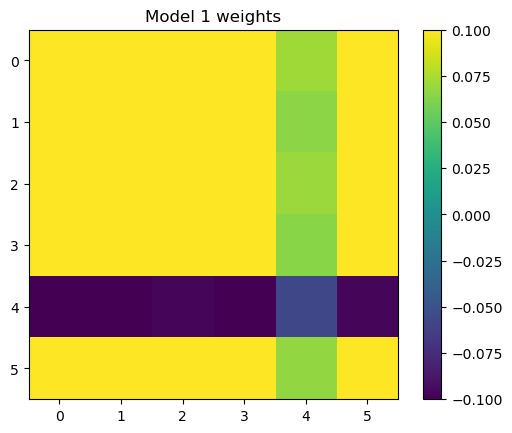

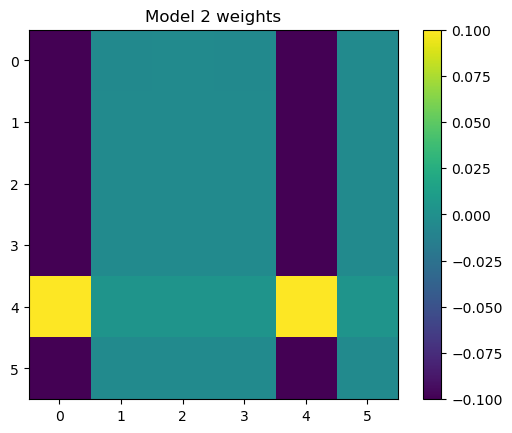

(1000, 9) (1000, 9)


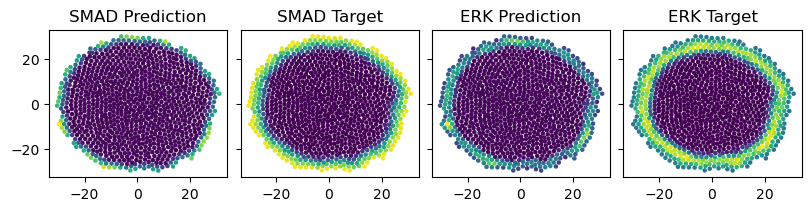

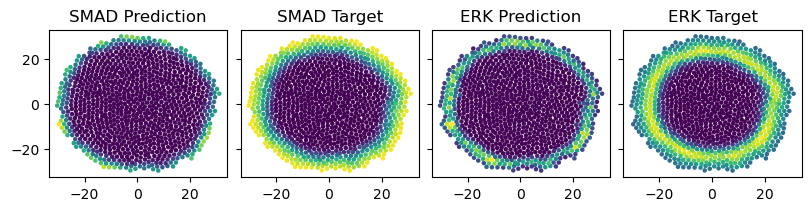

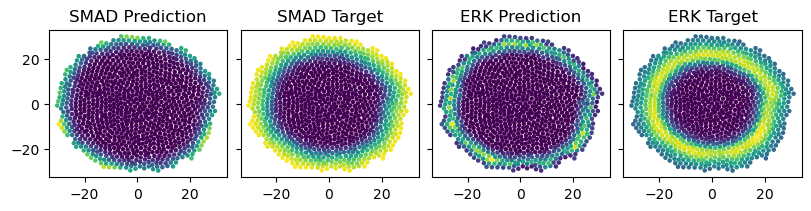

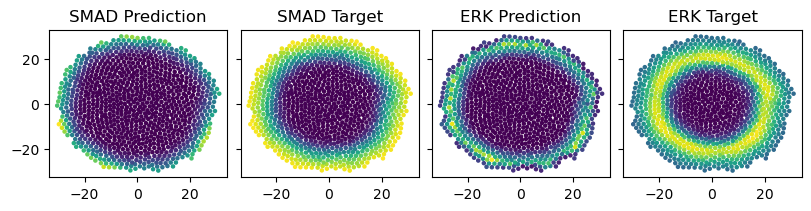

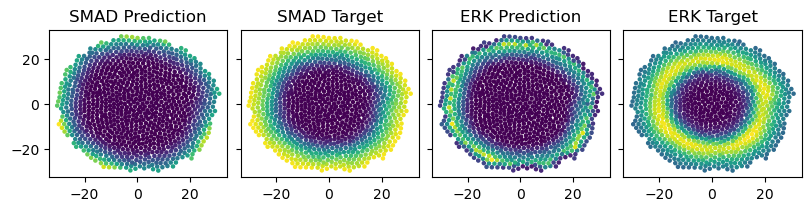

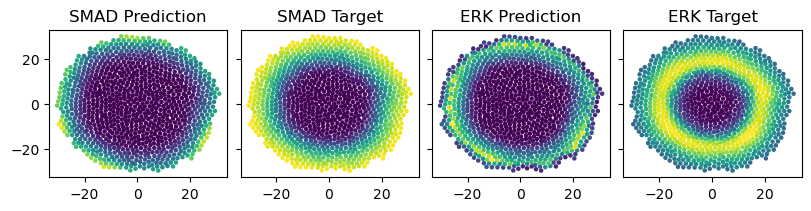

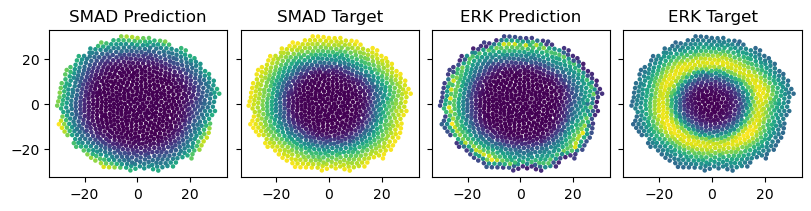

np.float64(20.647461668236616)

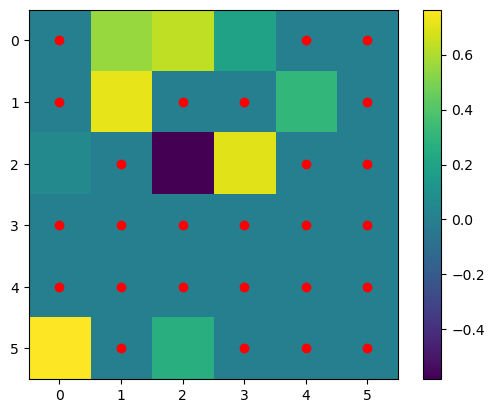

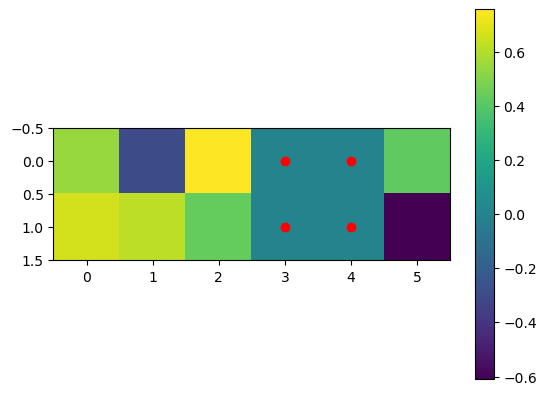

[array([[ True, False, False, False,  True,  True],
        [ True, False,  True,  True, False,  True],
        [False,  True, False, False,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [False,  True, False,  True,  True,  True]]),
 array([[False, False, False,  True,  True, False],
        [False, False, False,  True,  True, False]])]

In [18]:
prune(model, 0.01)

In [21]:
import sympy as sp

# set up the variables
S = sp.symbols('S', positive=True, real=True)
E = sp.symbols('E', positive=True, real=True)
B = sp.symbols('B', positive=True, real=True)
nb_S = sp.symbols('S_nb', positive=True, real=True)
nb_E = sp.symbols('E_nb', positive=True, real=True)
nb_B = sp.symbols('B_nb', positive=True, real=True)

inp_vec = sp.Matrix([ S, E, B, nb_S, nb_E, nb_B,])
# inp_vec = sp.Matrix([ S,B, nb_S,nb_B,])
inp_vec = sp.Matrix([S, B, nb_S, nb_B,])

# calculate the first layer
W0 = sp.Matrix(weights[0] * ~prune_masks[0])

X = W0*inp_vec
activation = sp.Function('sigma')

# activation = lambda x: x if x > 0 else 0
# activation = lambda x: x


XXX = []
for x in X:
    terms = sp.Add.make_args(x)
    if terms is None:
        XXX.append(x)
        continue

    if all(np.array(terms)>0):
        XXX.append(x)
        continue
    
    if all(np.array(terms)<0):
        XXX.append(0)
        continue

    XXX.append(activation(x))

# X = sp.Matrix([activation(x) for x in X])
X = sp.Matrix(XXX)

# squared

# sigmoid
# activation = lambda x: 1/(1 + sp.exp(-x))

# softplus
# activation = lambda x: sp.log(1 + sp.exp(x))


for i in range(1, len(weights)):
    W = sp.Matrix(weights[i] * ~prune_masks[i])
    X = W*X

    if i != len(weights)-1:
        X = sp.Matrix([activation(x) for x in X])

# define the activation function



# calculate the second layer

# simplify the expression


X

Matrix([[0.0349407*B + 0.63202*S + 0.357722*S_nb]])

In [191]:
# define differences 
S_diff = sp.symbols('S_diff', positive=True, real=True)
E_diff = sp.symbols('E_diff', positive=True, real=True)
B_diff = sp.symbols('B_diff', positive=True, real=True)

X_subbed = X.subs({S: nb_S + S_diff, E: nb_E + E_diff, B: nb_B + B_diff})

simp = sp.simplify(X,)
simp[0]


0.2185*E_nb - 0.011138*S + 0.262114*S_nb + 0.064207*sigma(-1.46919*B_nb - 0.338297*E + 1.8317*E_nb) + 0.113426*sigma(2.32898*B_nb - 1.49906*E_nb - 1.26453*S_nb) + 0.0281599*sigma(-0.439438*B - 0.642633*B_nb + 1.5287*E_nb + 1.13931*S_nb)